## Noiseless case 

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SGate
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix
import numpy as np
from matplotlib import pyplot as plt

In [2]:
qc = QuantumCircuit(1)
np.random.seed(1)

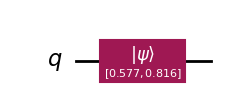

In [3]:
from math import sqrt
alpha=1/sqrt(3)
beta=sqrt(2)/sqrt(3)
qc.initialize([alpha, beta], 0)
qc.draw('mpl')

In [4]:
psi1=Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [5]:
rho= DensityMatrix(qc)
rho.draw('latex', prefix= "\\rho=")

<IPython.core.display.Latex object>

In [6]:
trace_den =np.trace(rho)
print(trace_den)

(1.0000000000000002+0j)


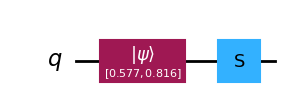

In [7]:
s_gate= SGate()
qc.append(s_gate, [0])
qc.draw('mpl')

In [8]:
psi2=Statevector(qc) # after passing through gate
psi2.draw('latex')

<IPython.core.display.Latex object>

In [9]:
rho_1= DensityMatrix(qc)
rho_1.draw('latex', prefix= "\\rho_1=")

<IPython.core.display.Latex object>

In [10]:
trace_den1 =np.trace(rho_1)
print(trace_den1)
fidelity= state_fidelity(rho,rho_1)
print(fidelity)

(1.0000000000000002+0j)
0.5555555555555556


In [11]:
prob_0 = alpha**2
prob_1 = beta**2
print(prob_0)
print(prob_1)

0.3333333333333334
0.6666666666666669


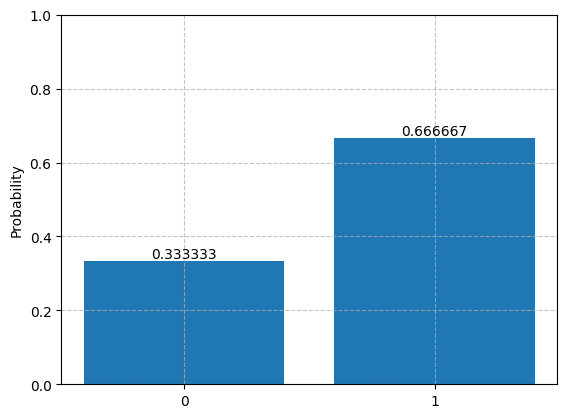

In [12]:
x_label = ['0', '1']
counts = [prob_0, prob_1]
fig, ax = plt.subplots()
bar_container = ax.bar(x_label, counts)
ax.set(ylabel='Probability', ylim=(0, 1))
ax.bar_label(bar_container)
plt.grid(True, linestyle='--', alpha=0.75)
plt.show()

In [13]:
# Probabaility after passing through noiseless gate
# Take diagonal elements of density matrix
density_matrix_array = rho_1.data
prob_0_gate = density_matrix_array[0,0] # after passing through gate 
prob_1_gate = density_matrix_array[1,1]
print(density_matrix_array)
print(prob_0_gate)
print(prob_1_gate)

[[0.33333333+0.j         0.        -0.47140452j]
 [0.        +0.47140452j 0.66666667+0.j        ]]
(0.3333333333333334+0j)
(0.6666666666666669+0j)


C:\Users\FJ03XV\PycharmProjects\Truncation_error\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\FJ03XV\PycharmProjects\Truncation_error\.venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


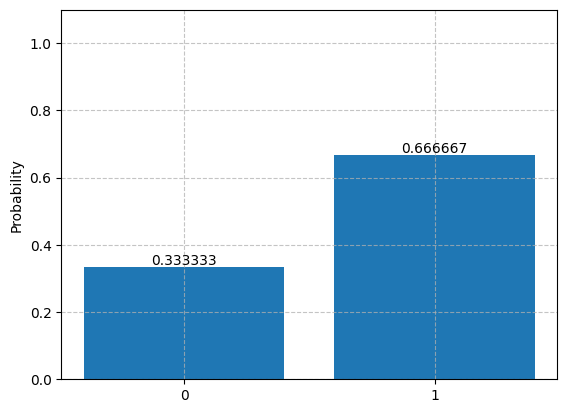

In [14]:
x_label = ['0', '1']
counts = [prob_0_gate, prob_1_gate]
fig, ax = plt.subplots()
bar_container = ax.bar(x_label, counts)
ax.set(ylabel='Probability', ylim=(0, 1.1))
ax.bar_label(bar_container)
plt.grid(True, linestyle='--', alpha=0.75)
plt.show()

## With Noise 

In [15]:
from scipy.linalg import sqrtm
prob_0_noisy=[]
prob_1_noisy=[]
prob_0_noisy_gate=[]
prob_1_noisy_gate=[]
fidelity_noisy=[]


In [16]:
def prob_calc(m,n):
    for i in range(100):
        del_alpha= - np.random.normal(loc=0, scale=m)
        del_beta = - np.random.normal(loc=0, scale=n)
        if (np.abs(alpha+del_alpha))**2+ (np.abs(beta+del_beta))**2<=1:
            # print((np.abs(alpha+del_alpha))**2+ (np.abs(beta+del_beta))**2)
            matrix1 = np.array([[alpha+del_alpha],[beta+del_beta]])
            print(matrix1.shape)
            matrix2 = matrix1.conjugate().transpose()            
            rho_delta = matrix1 @ matrix2    # density matrix            
            # print(rho_delta)
            prob_0_noisy.append(np.float64(rho_delta[0,0])) # before the gate 
            prob_1_noisy.append(np.float64(rho_delta[1,1]))
            U= np.array([[1, 0],[0, 1j]]) # S matrix
            U_dag= U.conjugate().transpose()
            rho_delta_gate = U @ rho_delta @ U_dag
            # print(rho_delta_gate)
            prob_0_noisy_gate.append(np.float64(rho_delta_gate[0,0]))  # after the gate 
            prob_1_noisy_gate.append(np.float64(rho_delta_gate[1,1]))
            mat = sqrtm(sqrtm(rho_delta)@ rho_delta_gate @ sqrtm(rho_delta))
            mat= mat@mat
            fidelity_noisy.append(np.float64(np.trace(mat)))
    exp_prob_0_noisy= np.mean(prob_0_noisy) 
    exp_prob_1_noisy= np.mean(prob_1_noisy)
    exp_prob_0_noisy_gate= np.mean(prob_0_noisy_gate)
    exp_prob_1_noisy_gate= np.mean(prob_1_noisy_gate)
    exp_fidelity_noisy = np.mean(fidelity_noisy)
    return exp_prob_0_noisy, exp_prob_1_noisy, exp_prob_0_noisy_gate, exp_prob_1_noisy_gate, exp_fidelity_noisy
            

In [17]:
sigma_alpha=np.linspace(0.01,0.1,11)
sigma_beta=np.linspace(0.01,0.1,len(sigma_alpha))
exp_prob_0_noisy=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_prob_1_noisy=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_prob_0_noisy_gate=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_prob_1_noisy_gate=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_fidelity_noisy=np.empty((len(sigma_alpha), len(sigma_alpha)))

i=0

for m in sigma_alpha:    
    j=0
    for n in sigma_beta:        
        exp_prob_0_noisy[i,j], exp_prob_1_noisy[i,j], exp_prob_0_noisy_gate[i,j], exp_prob_1_noisy_gate[i,j], exp_fidelity_noisy[i,j]=prob_calc(m,n)
        j=j+1
        # print(j)
    i=i+1
    # print(i)
        

(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)

C:\Users\FJ03XV\AppData\Local\Temp\ipykernel_6796\2054841599.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_0_noisy_gate.append(np.float64(rho_delta_gate[0,0]))  # after the gate
C:\Users\FJ03XV\AppData\Local\Temp\ipykernel_6796\2054841599.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_1_noisy_gate.append(np.float64(rho_delta_gate[1,1]))
C:\Users\FJ03XV\AppData\Local\Temp\ipykernel_6796\2054841599.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_noisy.append(np.float64(np.trace(mat)))


(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)

In [18]:
# print(exp_prob_0_noisy)
# print(exp_prob_1_noisy)
print(exp_prob_0_noisy_gate)
print(exp_prob_1_noisy_gate) 
# print(exp_fidelity_noisy)

[[0.32727876 0.33039002 0.33083355 0.33130511 0.33089612 0.33155263
  0.33166784 0.33167138 0.33155525 0.33170609 0.3319439 ]
 [0.33090854 0.33013352 0.32967399 0.32972065 0.32947998 0.32965253
  0.32996128 0.32998193 0.33000592 0.33009197 0.33014471]
 [0.32912362 0.32852657 0.32796146 0.32746183 0.32731508 0.32722166
  0.32723761 0.32753693 0.32774719 0.32794424 0.32783135]
 [0.3271381  0.32662006 0.32628746 0.32597623 0.32575177 0.3256275
  0.32543402 0.32539893 0.32556105 0.32569868 0.32532191]
 [0.32474711 0.32424183 0.32367304 0.32319438 0.32303416 0.32281366
  0.32277648 0.32276233 0.32274955 0.32260841 0.32251093]
 [0.32165509 0.32115876 0.32071488 0.32032544 0.31997311 0.31959109
  0.31956424 0.31937086 0.31934487 0.31941226 0.31945582]
 [0.31892238 0.3183928  0.31787596 0.3174067  0.31704382 0.316888
  0.31662329 0.31643128 0.31598836 0.31593604 0.3158813 ]
 [0.31518946 0.31471816 0.31442624 0.31402131 0.31368972 0.31332442
  0.31330691 0.31308874 0.31291078 0.31260018 0.31246

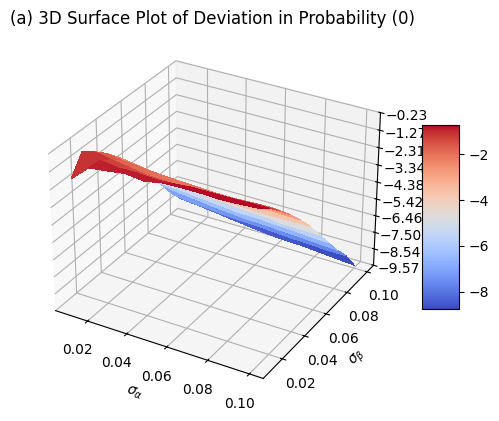

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z1 = 100*(exp_prob_0_noisy-prob_0)/prob_0
# Plot the surface.
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(a) 3D Surface Plot of Deviation in Probability (0)')

plt.show()

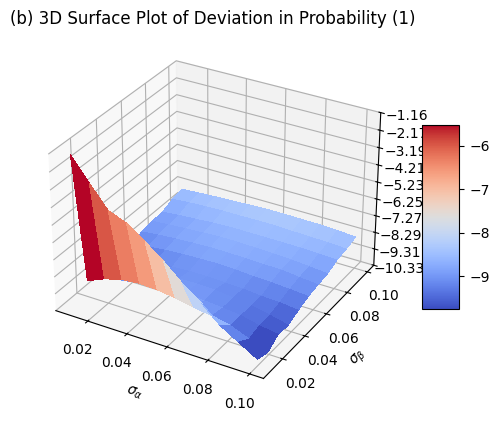

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z2 = 100*(exp_prob_1_noisy-prob_1)/prob_1

# Plot the surface.
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(b) 3D Surface Plot of Deviation in Probability (1)')

plt.show()

C:\Users\FJ03XV\PycharmProjects\Truncation_error\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


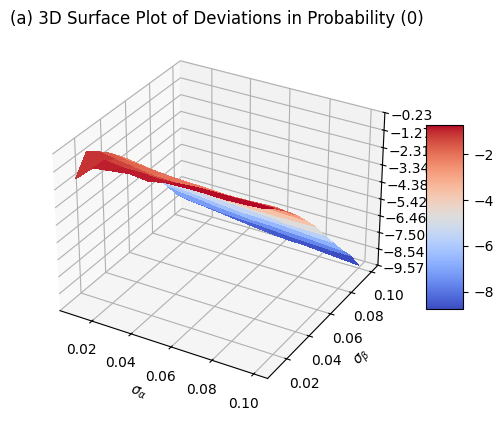

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z3 = 100*(exp_prob_0_noisy_gate-prob_0_gate)/prob_0_gate

# Plot the surface.
surf = ax.plot_surface(X, Y, Z3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(a) 3D Surface Plot of Deviations in Probability (0)')

plt.show()

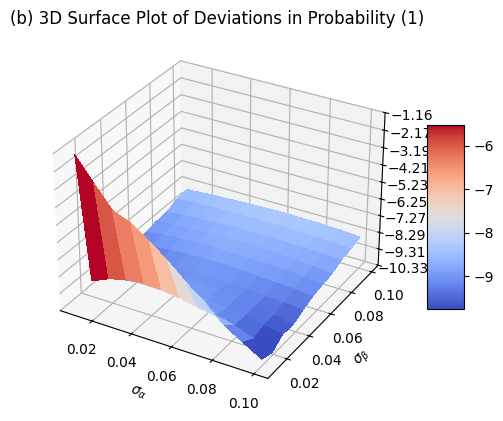

[[ -1.33949266+0.j  -2.6583289 +0.j  -3.92079153+0.j  -4.33074782+0.j
   -5.09060512+0.j  -5.90944391+0.j  -6.86661919+0.j  -7.64881261+0.j
   -8.61711774+0.j  -9.26843297+0.j  -9.91313506+0.j]
 [ -9.26304559+0.j  -8.81085269+0.j  -8.5230379 +0.j  -8.41726035+0.j
   -8.47466856+0.j  -8.62018694+0.j  -8.83614589+0.j  -9.00179977+0.j
   -9.24834074+0.j  -9.69573674+0.j -10.14243653+0.j]
 [ -9.70546445+0.j  -9.40312381+0.j  -9.24980638+0.j  -9.06066864+0.j
   -8.9603739 +0.j  -8.97430458+0.j  -9.04614574+0.j  -9.14462923+0.j
   -9.25578254+0.j  -9.51724316+0.j  -9.6707565 +0.j]
 [ -9.41370844+0.j  -9.21512445+0.j  -9.06155209+0.j  -9.00122221+0.j
   -8.96956726+0.j  -8.95424371+0.j  -8.99317549+0.j  -9.12950436+0.j
   -9.25775798+0.j  -9.47368741+0.j  -9.73238778+0.j]
 [ -9.55489198+0.j  -9.38716088+0.j  -9.27522669+0.j  -9.15287172+0.j
   -9.09395924+0.j  -9.0884001 +0.j  -9.13742805+0.j  -9.16851606+0.j
   -9.27375593+0.j  -9.32358604+0.j  -9.43012174+0.j]
 [ -9.24764433+0.j  -9.1282455

In [22]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z4 = 100*(exp_prob_1_noisy_gate-prob_1_gate)/prob_1_gate

# Plot the surface.
surf = ax.plot_surface(X, Y, Z4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(b) 3D Surface Plot of Deviations in Probability (1)')

plt.show()

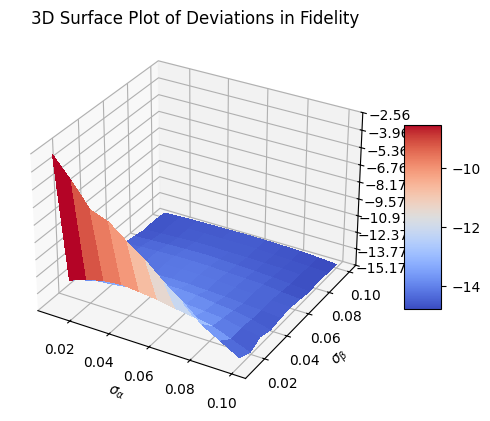

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z5 = 100*(exp_fidelity_noisy- fidelity)/fidelity

# Plot the surface.
surf = ax.plot_surface(X, Y, Z5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('3D Surface Plot of Deviations in Fidelity')

plt.show()